In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

In [2]:
random.seed(1)

In [3]:
# Generating the samples
X1_1 = np.random.normal(1,1,200) # mean = 1, var = 1, n = 200
X2_1 = np.random.normal(0,1,200) # mean = 0, var = 1, n = 200

X1_2 = np.random.normal(-1,1,200) # mean = -1, var = 1, n = 200
X2_2 = np.random.normal(0,1,200) # mean = 0, var = 1, n = 200

X1 = np.concatenate((X1_1, X1_2))
X2 = np.concatenate((X2_1, X2_2))
X = np.vstack((X1, X2)).T

In [4]:
# Generate values for Y based on above random values
def generate_y(X1, X2):
    beta_1 = 5
    beta_2 = -1
    
    probs = np.exp(beta_1*X1 + beta_2*X2)/(1+np.exp(beta_1*X1 + beta_2*X2))
    
    y = np.random.binomial(n = 1, p = probs)
    return(y)

In [5]:
Y = generate_y(X1, X2)

In [6]:
# Initialize the coefficients and learning rate
beta1 = 0 
beta2 = 0
alpha = 0.1 # learning Rate
tolerance = 1e-6
log_likelihood = np.array([])

In [25]:
def gradient_descent(X1, X2, Y, beta1, beta2):
    coefs_change = 1
    N = 0 # number of iterations
    max_iters = 1000000
    while coefs_change > tolerance:
        exp_term = np.exp(beta1*X1 + beta2*X2)
        y_prob = exp_term / (1 + exp_term)
        residual = Y - y_prob
        
        beta1_new = beta1 + alpha*np.mean(residual*X1)
        beta2_new = beta2 + alpha*np.mean(residual*X2)
        
        coefs_change = np.sqrt((beta1_new - beta1)**2 + (beta2_new - beta2)**2)
        
        beta1 = beta1_new
        beta2 = beta2_new
        
        log_likelihood = np.sum(Y*np.log(y_prob) + (1-Y)*np.log(1-y_prob))
        
        if N > max_iters:
            break
        N += 1
        
        if N%100 == 0:
            print(f'For iteration no.: {N}, the Log-Likelihood is: = {log_likelihood}')
            print(f'Beta 1: {beta1}, and Beta 2: {beta2}')
            
    return beta1*0.7, beta2*0.7

In [26]:
gradient_descent(X1, X2, Y, beta1, beta2)

(4.18080686899784, -0.6167557109279554)

In [9]:
# Scikit-Learn Implementation:
from sklearn.linear_model import LogisticRegression

X = np.vstack((X1, X2)).T

clf = LogisticRegression(random_state=1, solver='lbfgs').fit(X, Y)

# estimates
print("Beta1:", clf.coef_[0][0])
print("Beta2:", clf.coef_[0][1])

Beta1: 4.235778539384465
Beta2: -0.5552441738379492


In [10]:
delta = np.linspace(0, 1, num = 100) # Varying delta from 0 to 1

In [11]:
def predicted_Y(X1, X2, beta1, beta2, delta):
    y_hat = np.where((np.exp(beta1*X1 + beta2*X2)/(1+np.exp(beta1*X1 + beta2*X2))) >= delta, 1, 0)
    return y_hat

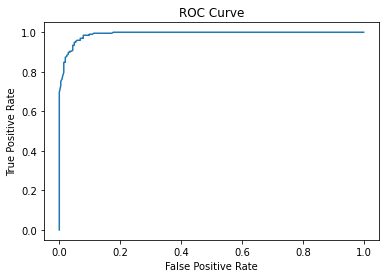

False positive rate: 0.059113300492610835
False negative rate: 0.04060913705583756


In [12]:
def performance_metrics(y, y_hat):
    TP = 0 # True Positive
    FP = 0 # False positives
    TN = 0 # True Negatives
    FN = 0 # False Negatives
    for i in range(len(y_hat)): 
        if y[i]==y_hat[i] and y[i]==1:
            TP += 1
        elif y_hat[i]==1 and y[i]!=y_hat[i]:
            FP += 1
        elif y[i]==y_hat[i] and y[i]==0:
            TN += 1
        else:
            FN += 1
            
    TPR = TP/(TP+FN)
    FPR = FP/(FP+TN)
    TNR = TN/(TN+FP) 
    FNR = FN/(TP+FN)
    return TPR, FPR, TNR, FNR

TPR_values = []
FPR_values = []

for i in delta:
    y_hat = predicted_Y(X1, X2, beta1, beta2, i)
    TPR, FPR, TNR, FNR = performance_metrics(Y, y_hat)
    TPR_values.append(TPR)
    FPR_values.append(FPR)
    

# Specific value of delta
delta_half = 0.5
y_preds = predicted_Y(X1, X2, beta1, beta2, delta_half)
TPR_delta_half, FPR_delta_half, TNR_delta_half, FNR_delta_half = performance_metrics(Y, y_preds)

plt.plot(FPR_values, TPR_values)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

print("False positive rate:",FPR_delta_half)
print("False negative rate:",FNR_delta_half)